In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from scipy.optimize import curve_fit
from imageio import imread
import scienceplots # Para obtener graficos de alta calidad
import glob
from matplotlib.ticker import FormatStrFormatter

plt.style.use(['science','notebook','grid','std-colors'])
#plt.style.use(['nature','no-latex'])

os.getcwd()

'C:\\Users\\JAAL_\\Documentos\\ODMR-jupyter-calculo-magnetometria\\Datos-para-magnetometria\\CorteTOTAL'

In [5]:
# Para regresar a la carpeta
os.chdir('C:\\Users\\JAAL_\\Documentos\\Academico\\Tesis\\Redacción-tesis\\Imagenes-de-la-tesis-en-orden\\Figuras-oficiales-enumerados-hechas\\Figuras-capitulo-4\\Figura-8-9-ODMR\\ODMR-con-campo')

# Cargando la data obtenida del experimento para ODMR con campo

C:\Users\JAAL_\AppData\Local\Temp\ipykernel_31200\1463253266.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag = imread(file[i][j])


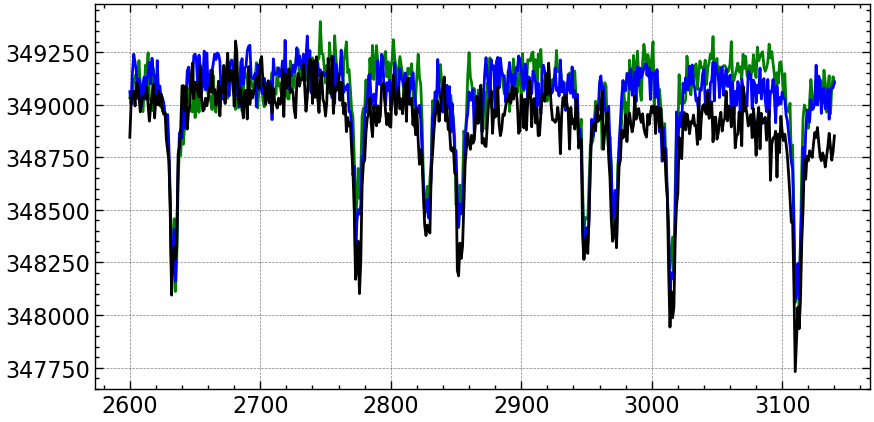

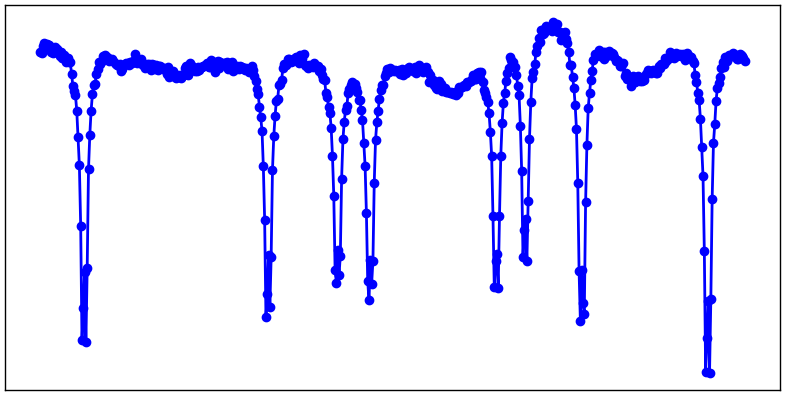

In [6]:
os.chdir('C:/Users/JAAL_/Documentos/ODMR-jupyter-calculo-magnetometria/Datos-para-magnetometria/CorteTOTAL/')

nmedias = 64 # Esta variable representa la cantidad de archivos de imágenes que se van a procesar.
# Son en total 34,624 fotos que dividio entre 64 da : 541 fotos por cada numeración de foto
''' Las fotos estan etiquetadas de la siguiente manera 
(numero1)_image_(numero2) 
donde: 
* numero1 = Entre 1-64
* numero2 = Entre 2600-3140
'''
file = list()
for i in range(1,nmedias+1):
    # va a guardar en una lista doble
    '''La función principal que se utiliza en el paquete glob es glob.glob(), que devuelve una lista de rutas de 
    archivos o directorios que coinciden con el patrón especificado.'''
    file.append(glob.glob(str(i)+'_image_*.png')) # se agrega los elementos de file los que coincidan con la (numero1) iteración

#  Se define una función llamada my_range que genera un rango de números similar a la función range(), 
# pero con la posibilidad de especificar un paso diferente de 1.
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step    

# el rango de frecuencias
# El rango de frecuencias de las fotos
x1 = [x for x in my_range(2870-270,2870+270,1)]
      
ODMR = []
for i in range(nmedias): #recorre las fotos
    n = list()
    for j in range(len(x1)): # recorre las frecuencias
        # lee la imagen y crea el array. 
        imag = imread(file[i][j])
        # suma y lo guarda el valor alli.
        n.append(np.sum(imag))
        
    # Al final tiene un array con los valores de intensidad de todas las fotos
    ODMR.append(n)
    
'''
Al final tienes una supermatriz ODMR de nmedias x frecuencias donde cada fila ''i'' representa el numero de foto (numero1) 
y la columna ''j'' representa la frecuencia. 
'''

########### Grafica de algunos datos ########
plt.figure(figsize=(10,5))
for i, color in zip(range(0, 3), ['-g', '-b', '-k', '-r']):
    plt.plot(x1, ODMR[i], color)
plt.show()


ODMR = np.array(ODMR)
# Cálculo de la suma (media) y la desviación estándar para cada frecuencia (sobre el eje 0)
nt = np.sum(ODMR, axis=0)  # Suma para cada frecuencia
desviacion_estandar = np.std(ODMR, axis=0)  # Desviación estándar para cada frecuencia

# Normalización de la suma
norm_factor = np.max(nt) # Se debe normalizar tanto los datos como la desviación estandar por el mismo valor 
Nnt = nt / norm_factor
# Normalización de la desviación estándar
desviacion_estandar_normalizada = desviacion_estandar / norm_factor

# Estructura de datos para guardar 
# (guarda como dos columna / 1 columna las frecuencia / 2 columna la fluorescencia normalizada ) )
A = np.column_stack((x1, Nnt))
 
# Para regresar a la carpeta
os.chdir('C:\\Users\\JAAL_\\Documentos\\Academico\\Tesis\\Redacción-tesis\\Imagenes-de-la-tesis-en-orden\\Figuras-oficiales-enumerados-hechas\\Figuras-capitulo-4\\Figura-8-9-ODMR\\ODMR-con-campo')
np.savetxt('ODMRCORTETOAL.txt',A,fmt='%s')

plt.figure(figsize = (10,5))
plt.plot(x1,Nnt,'-ob')
plt.tick_params(direction='out', length=4, width=2, colors='black',labelsize=10)
plt.grid()
# Eliminar los ejes (ticks) de la subfigura
plt.xticks([])
plt.yticks([])
plt.savefig("ODMR-con-campo-sin-etiquetas")
plt.show()

# ODMR con campo (maximo 8 valles)

## Fitting del ODMR
Este puede ser modelado por una suma de funciones lotenzianas (maximo 8 suma)
$$
\frac{I(f)}{I(0)} = 1 - \sum_{i}C_i \left(\frac{\left(\frac{\Gamma_i}{2}\right)^2}{(f-f_{0,i})-\left(\frac{\Gamma_i}{2}\right)^2} \right)
$$

donde 
- $C_i$, $\Gamma_i$ y $f_{0,i}$ son respectivamente el contraste, el Full-width half-maximum (FWHM) y la frecuencia de resonancia en el valle ''i''. 
- $I(0)$ es la intensidad de fluorescencia lejos de las transiciones de resonancia

### Encontrando las frecuencias de resonancia

Índices de los mínimos locales: [ 35 173 227 252 351 373 414 513]
Valores de los mínimos locales: [0.99708767 0.99731744 0.99762481 0.99746919 0.99757739 0.99782635
 0.99727653 0.9968113 ]
[2635. 2773. 2827. 2852. 2951. 2973. 3014. 3113.]


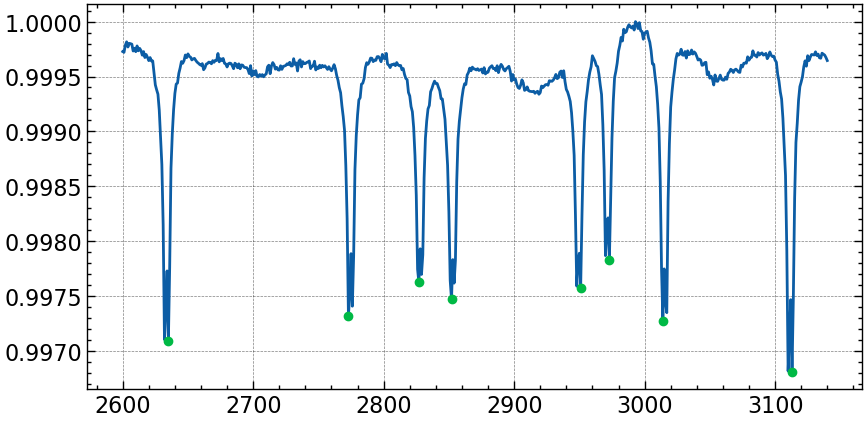

In [23]:
from scipy.signal import find_peaks

# Calculo de minimos
dataODMR = np.loadtxt('./ODMRCORTETOAL.txt')
fmw = dataODMR[:,0]
y = dataODMR[:,1]

minimos_locales, _ = find_peaks(-y,distance=5,height=-0.9991)

# Imprimir los índices de los mínimos locales
print("Índices de los mínimos locales:", minimos_locales)

# Imprimir los valores de los mínimos locales
print("Valores de los mínimos locales:", y[minimos_locales])
frecmin = np.array(fmw[minimos_locales])

print(frecmin)

plt.figure(figsize = (10,5))
plt.plot(fmw,y,'-')
plt.plot(fmw[minimos_locales],y[minimos_locales],'o')
plt.show()

### Intentando encontrar las parametrizaciones con los minimos 
**conclusión: Tengo que crear mi propio algoritmo para parametrizar; sin embargo otra solución 
es separar por partes la data y hacer parametrización en cada valle**

**Por otro lado, es necesario?, es decir puedo hallar minimos solo usando una comparación de puntos**

[2.37822782e-03 2.00098125e-03 2.13518639e-03 2.15306545e-03
 1.71693216e-03 1.88489088e-03 2.52117753e-03 2.75096096e-03
 1.04383387e+01 1.36615584e+01 8.90981315e+00 1.09232157e+01
 1.52860044e+01 5.35242606e+00 7.50587726e+00 9.35515143e+00]


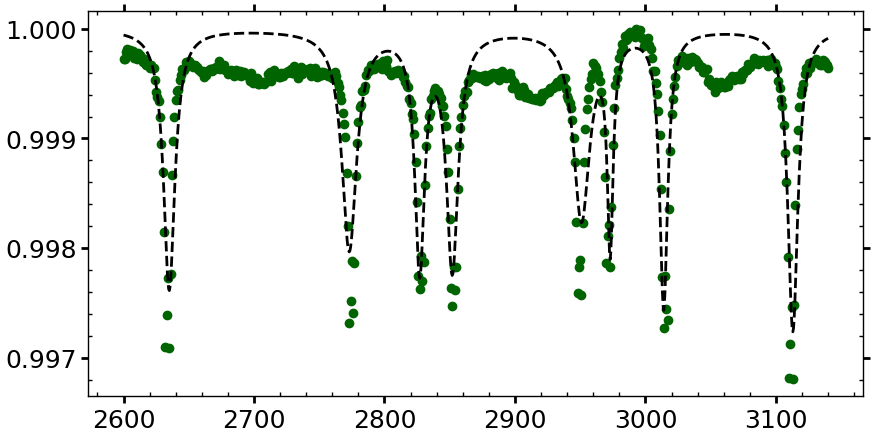

In [24]:
def func_8picos(fmw,c0,c1,c2,c3,c4,c5,c6,c7,g0,g1,g2,g3,g4,g5,g6,g7):
	return 1 - ( c0*(((g0/2)**2)/((fmw-(frecmin[0]))**2+(g0/2)**2))+ \
                 c1*(((g1/2)**2)/((fmw-(frecmin[1]))**2+(g1/2)**2))+ \
                 c2*(((g2/2)**2)/((fmw-(frecmin[2]))**2+(g2/2)**2))+ \
                 c3*(((g3/2)**2)/((fmw-(frecmin[3]))**2+(g3/2)**2))+ \
                 c4*(((g4/2)**2)/((fmw-(frecmin[4]))**2+(g4/2)**2))+ \
                 c5*(((g5/2)**2)/((fmw-(frecmin[5]))**2+(g5/2)**2))+ \
                 c6*(((g6/2)**2)/((fmw-(frecmin[6]))**2+(g6/2)**2))+ \
                 c7*(((g7/2)**2)/((fmw-(frecmin[7]))**2+(g7/2)**2)) )

xfit = np.linspace(min(fmw),max(fmw),1000)
parametros_optimos, matriz_covarianza = curve_fit(func_8picos, fmw, y, p0=(0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.002,5,10,5,5,5,5,5,5))

print(parametros_optimos)

plt.figure(figsize = (10,5))
plt.plot(fmw,y,'o',color='darkgreen')
# plt.errorbar(fmw,y,yerr=yer, fmt='o',color='navy')
plt.plot(xfit,func_8picos(xfit,*parametros_optimos),'--',label = "Fit", color = 'black')
plt.tick_params(direction='out', length=5, width=2, colors='black',labelsize=18)
plt.grid()
plt.show()

### Intentando mejorar el fitting con un modelo cuadratico

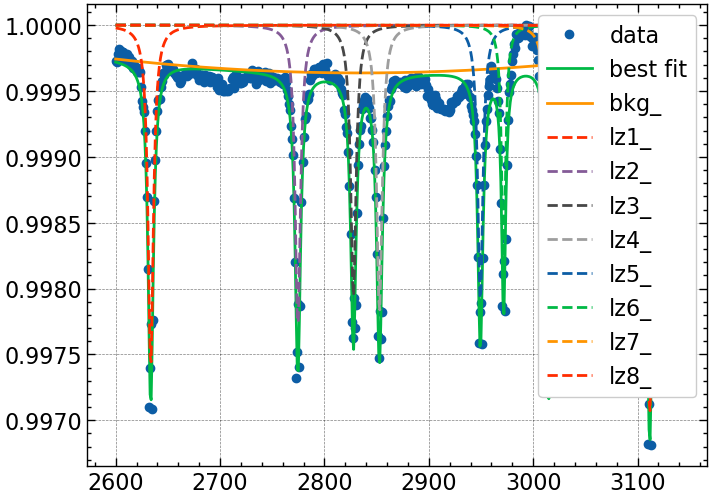

In [25]:
# import matplotlib.pyplot as plt
import numpy as np
# para crear modelos y ajustar datos. LorentzianModel y QuadraticModel son dos tipos 
# de modelos que se utilizan para ajustar los datos.
from lmfit.models import LorentzianModel, QuadraticModel 

# Calculo de minimos
dataODMR = np.loadtxt('ODMRCORTETOAL.txt')
xdat = np.array(dataODMR[:,0])
ydat = np.array(dataODMR[:,1])
'''Ejemplo de leyenda: "Barras de error amplificadas por un factor de 10 para mejorar la visualización."'''
scale_factor = 1 # es necesario para visualizar los errores relativos
yer = desviacion_estandar_normalizada * scale_factor # el error

def add_peak(prefix, center, amplitude=6, sigma=3):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (2635, 2773, 2827, 2852, 2951, 2973, 3014, 3113)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

# print(result.fit_report(min_correl=0.5))

plt.plot(xdat, ydat,'o', label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    if name == 'bkg_':
        plt.plot(xdat,comps['bkg_'], label='bkg_')
    else:
        plt.plot(xdat, comp + 1, '--', label=name)
plt.legend(loc='upper right')
plt.show()

# Campo con un solo valle

[2.02769608e-03 2.19800732e-03 2.63984121e+00 3.32653527e+00
 2.63216932e+03 2.63530847e+03]


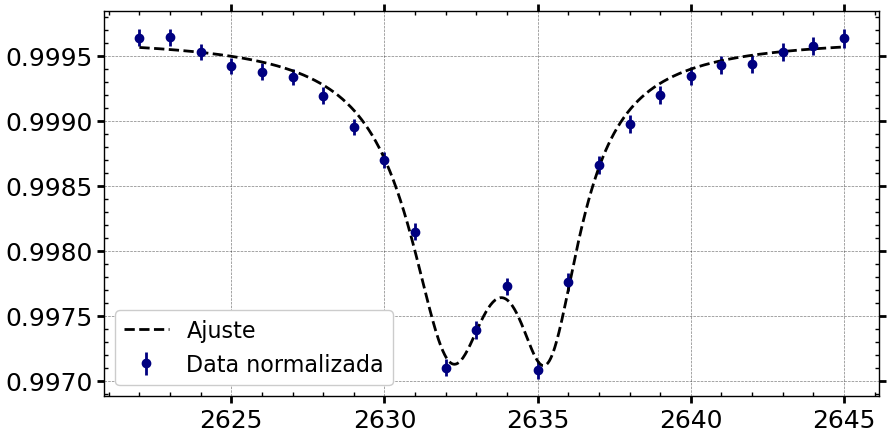

In [115]:
inicio = 22
fin = 46

fmw2 = dataODMR[inicio:fin,0]
y2 = dataODMR[inicio:fin,1]/max(dataODMR[::,1])
'''Ejemplo de leyenda: "Barras de error amplificadas por un factor de 10 para mejorar la visualización."'''
scale_factor = 3 # es necesario para visualizar los errores relativos
yer2 = desviacion_estandar_normalizada[inicio:fin] * scale_factor # el error

nu_menos_prueba = 2632
nu_mas_prueba =2635

def func(fmw2,c1,c2,g1,g2,nu_menos,nu_mas):
	return max(dataODMR[inicio:fin,1]) - c1*(((g1/2)**2)/((fmw2-(nu_mas))**2+(g1/2)**2)) - c2*(((g2/2)**2)/((fmw2-(nu_menos))**2+(g2/2)**2))

xfit2 = np.linspace(min(fmw2),max(fmw2),1000)
parametros_optimos2, matriz_covarianza2 = curve_fit(func, fmw2, y2, p0=(1.2,1.9,3,3,nu_menos_prueba,nu_mas_prueba))

print(parametros_optimos2)

plt.figure(figsize = (10,5))
plt.errorbar(fmw2,y2,yerr=yer2, fmt='o',color='navy',label='Data normalizada')
plt.plot(xfit2,func(xfit2,*parametros_optimos2),'--',label = "Ajuste", color = 'black')
plt.tick_params(direction='out', length=5, width=2, colors='black',labelsize=18)
plt.legend()
# Reducir la cantidad de decimales en las etiquetas del eje y
# plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # Dos decimales
plt.grid(True)
# Añadir un rectángulo en la gráfica principal que indique la región ampliada
plt.savefig("ODMR-con-campo-un-valle")
plt.show()

In [87]:
fmw2, y2

(array([2622., 2623., 2624., 2625., 2626., 2627., 2628., 2629., 2630.,
        2631., 2632., 2633., 2634., 2635., 2636., 2637., 2638., 2639.,
        2640., 2641., 2642., 2643., 2644., 2645.]),
 array([0.99999946, 1.        , 0.99988647, 0.99978128, 0.99973668,
        0.99969652, 0.99955265, 0.99931105, 0.9990558 , 0.99850677,
        0.99746052, 0.99775198, 0.99808585, 0.99744441, 0.99812049,
        0.99902116, 0.9993351 , 0.99955503, 0.9997045 , 0.999789  ,
        0.9997978 , 0.99988665, 0.99993525, 0.99999421]))

# Un mejor gráfico

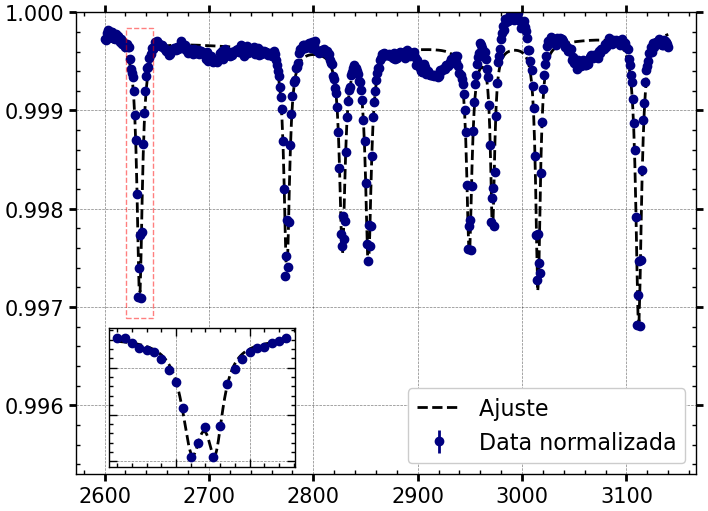

In [116]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

###################### Figura ###############################

# Crear gráfico principal
fig, ax = plt.subplots()
ax.errorbar(fmw,y,yerr=yer, fmt='o',color='navy',label='Data normalizada')
ax.plot(xdat, result.best_fit,'--', label='Ajuste ',color='black')
ax.tick_params(direction='out', length=5, width=2, colors='black',labelsize=15)
ax.legend(loc='lower right')
ax.set_ylim(0.9953,1)
ax.grid(True)


#################################### Subfigura ############################333

# Insertar zoom en una posición específica usando coordenadas [x0, y0, width, height]
# Los valores son relativos al tamaño de la figura (0 a 1)
axins = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(0.07, 0.04, 0.3, 0.3), bbox_transform=ax.transAxes) 

axins.errorbar(fmw2,y2,yerr=yer2, fmt='o',color='navy',label='Data normalizada')
axins.plot(xfit2,func(xfit2,*parametros_optimos2),'--',label = "Ajuste", color = 'black')

# axins.errorbar(fmw,y,yerr=yer, fmt='o',color='navy',label='Data normalizada')
# axins.plot(xdat, result.best_fit,'--', label='Ajuste ',color='black')

# Definir la región de zoom (por ejemplo, entre 2 y 4 en el eje x)
#x1, x2, y1lim, y2lim = 2622, 2645, 0.9997045, 1
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1lim, y2lim)

# Asegurar que la subfigura tenga el aspecto correcto y los datos no se amontonen
axins.set_aspect('auto')  # 'equal' para mantener relación 1:1 entre los ejes, 'auto' para ajustarlo según los datos

# Mantener los ticks pero eliminar los números de los ejes
axins.tick_params(labelleft=False, labelbottom=False)

# Personalizar las líneas de conexión: rojas y punteadas
ax.indicate_inset_zoom(axins, edgecolor='red', linestyle='--')


plt.savefig("ODMR-con-campo-total")
plt.show()

## Sensibilidad del campo magnetico
De estos parametros se puede calcular la sensibilidad magnetica $\eta$ de la tecnica ODMR

$$
\eta = \frac{4h}{3\sqrt{3}g_e \mu_B} \frac{\Gamma}{C\sqrt{I(0)}}
$$

donde: 
- $\mu_B = 9.27 \cdot 10^{-24}$ J.T^{-1}
- $g_e = 2.0023$ 
- $h = 6.626 \cdot 10^{-34}$ J.s

## Extraemos solo una parte de la data de ODMR con campo

## Cálculo de campo mágnetico

In [12]:
D = 2871.75
E = 3.75
h = 6.626*10**(-34) # J.s
ge = 2.0023 
mu_B  = 9.27 * 10**(-24) # J.T^{-1}

hgemuB = h/(ge*mu_B)
display(hgemuB)
display(frecmin)

## Hallando el modulo de campo magnetico
B = []
for i in range(1,5):
    # El 10**(6) es para hacer cuentas de MHz
    Bvalor = hgemuB*10**(6)*( 1/3*(frecmin[i-1]**2 + frecmin[-i]**2 - frecmin[i-1]*frecmin[-i] - D**2) - E**2 )**(1/2)
    B.append(Bvalor)
display(B)

Bcalc = np.array(B).mean()
Bstd = np.array(B).std()

print(f'B:{Bcalc*10**3} mT')
print(f'B:{Bstd*10**3} mT')

########### ################


3.569789025253106e-11

array([2635., 2773., 2827., 2852., 2951., 2973., 3014., 3113.])

[0.00884675902460994,
 0.00847057981414724,
 0.008719759273345529,
 0.008721366707758707]

B:8.689616204965354 mT
B:0.13655356574205518 mT
